---

Title: "Data Science in Telco: Data Cleansing"

Author: "Joseph Armando Carvallo"

Date: "21/03/2021"

---

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has been consistent in paying attention to its customer experience so that customers will not leave it. Even though it's only a little over 1 year old company, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

Therefore, the Data Scientist team was asked to prepare the data as well as to make the right prediction model to determine whether a customer will churn or not.

As a Data Scientist, I was asked to prepare the data before doing the modeling.
I will do Data Preprocessing (Data Cleansing) last month, which is June 2020. The steps to be taken are,
1. Looking for a valid customer ID or telphone number
2. Handling data that is still empty or missing values
3. Handling outlier values from each variable
4. Standardizing values of variables

The Python package that I will be using in doing the analysis are
* Pandas (Python for Data Analysis) is a Python library that focuses on data analysis processes such as data manipulation, data preparation, and data cleaning.
* Matplotlib is a Python library that focuses on data visualization such as plotting graphs. Matplotlib can be used in Python scripts, Python and IPython shells, web application servers, and several other graphical user interface (GUI) toolkits.
* Seaborn builds on Matplotlib and introduces additional plot types. It also makes your traditional Matplotlib plots look attractive.

For the dataset used, it is provided in csv format, it can be downloaded at https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv

The detailed data are as follows:

`UpdatedAt` is the period of data taken

`customerID` is phone number of customer

`gender` is gender of customer, the values in format male or female

`SeniorCitizen` is seniority status of customer, the values in format 1 (yes) or 0 (no)

`Partner` is marital status of customer, the values in format Yes or No

`Dependents` is dependents of customer, the values in format Yes or No

`tenure` is number of months customer has stayed with the company

`PhoneService`is whether customer has phone service or not, the values in format Yes or No

`MultipleLines` is whether customer has multiple lines or not, the values in format Yes, No, or No phone service

`InternetService` is internet service provider of customer, the values in format DSL, Fiber optic, or No

`OnlineSecurity`is whether customer has online security or not,  the values in format Yes, No, or No internet service

`OnlineBackup` is whether customer has online backup or not, the values in format Yes, No, or No internet service

`DeviceProtection` is whhether customer has device protection or not, the values in format Yes, No, or No internet service

`TechSupport` is whether customer has tech support or not, the values in format Yes, No, or No internet service

`StreamingTV` is whether customer has streaming TV or not, the values in format Yes, No, or No internet service

`StreamingMovies` is whether customer has streaming movies or not, the values in format Yes, No, or No internet service

`Contract` is the contract term of customer, the values in format Month-to-month, One year, or Two year

`PaperlessBilling` is whether the customer has paperless billing or not, the values in format Yes or No

`PaymentMethod` is the payment method of customer, the values in format Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)

`MonthlyCharges` is the amount charged to the customer monthly

`TotalCharges` is the total amount charged to the customer

`Churn` is whether the customer churned or not, the values in format Yes or No

**Import Libraries and Datasets**

Based on the explanation of the libraries and datasets that will be used, now the first thing I am going to do is to import the libraries and datasets into the workspace. After the dataset is imported into the workspace, I am displaying the number of columns and rows of the data set using `.shape` and print the first five rows using `.head()` and I am finding out how many unique customerID values are using `.nunique()`

In [ ]:
import pandas as pd

# Facilitate the appearance of row data
pd.options.display.max_columns = 50

# Importing Data Source
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
print("Size of dataset", df_load.shape)
df_load.head(5)

Size of dataset (7113, 22)


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df_load.customerID.nunique())

7017


**Filtering `customerID` with certain formats**

Look for the correct `customerID` (customer phone number) format, with the following criteria:
* character length is 11 to 12,
* consists of numbers only, no characters other than numbers are allowed,
* checkers start with the number 45 which is the first two digits.

I am using `.count()` function to count the number of `Customer ID` rows, `.str.match()` and `regex` to match the criteria above, and `astype()` to change the data type to numeric.

In [ ]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('The result of the filtered number of Customer IDs is',df_load['customerID'].count())

The result of the filtered number of Customer IDs is 7006


**Filtering Duplicate `CustomerID`**

I will make sure that there are no duplicate values of `customer_ID`. Usually, the type of duplicate `CustomerID` are
* duplication due to inserting more than once with the same value for each column
* duplication due to inserting different data retrieval period

I am using the result of processing in the previous step to be processed in this step. I am also using `drop_duplicates()` function to remove duplicate rows, and `sort_values()` to check the last recorded data.

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()

# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('The number of `CustomerID` that has been removed (distinct) are',df_load['customerID'].count())

The number of `CustomerID` that has been removed (distinct) are 6993


The validity of `CustomerID` is needed to ensure that the data I retrieve is correct. Based on those results, there are differences in the number of `CustomerID` from the first data loaded to the final result. The number of rows of data when it was first loaded was 7113 rows and 22 columns with 7017 unique `CustomerID` numbers. Then after checking the validity of `CustomerID`, the remaining 6993 rows of data.

**Handle missing values by deleting rows**

The next step, I am deleting rows from data that is not detected whether the customer churned or not. It is assumed that the data modeller only accepts data that has churn flag or not. I am using `isnull()` to detect missing values and `dropna()` to remove missing values

In [ ]:
print('Total missing values data from the Churn column are',df_load['Churn'].isnull().sum())

# Dropping all Rows with spesific column
df_load.dropna(subset=['Churn'],inplace=True)

print('Total rows and columns of the data after missing values deleted are',df_load.shape)

Total missing values data from the Churn column are 43
Total rows and columns of the data after missing values deleted are (6950, 22)


**Handle missing values by filling in certain values**

In addition to removing rows from the data, handling missing values can use certain values. It is assumed that the data modeler requires filling in the missing values with the following criterias:
* `tenure` of data modeller requires that each row that has missing values for the length of the subscription be filled with 11,
* and the other numeric variables are filled with the median of each variables.

In [ ]:
print('Status of Missing Values is',df_load.isnull().values.any())
print('\nThe number of missing values for each column is')
print(df_load.isnull().sum().sort_values(ascending=False))

# Handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

print('\nThe number of missing values after imputering the data is')
print(df_load.isnull().sum().sort_values(ascending=False))

Status of Missing Values is False

The number of missing values for each column is
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

The number of missing values after imputering the data is
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Streaming

After further analysis, it turns out that there were missing values from the data that I had validated for `CustomerID`. Missing values were found in the `Churn`, `tenure`, `MonthlyCharges` and `TotalCharges` columns. Then after I handled them by deleting rows and filling rows with certain values, they were proven no more missing values in the data, as evidenced by the number of missing values for each variable which is worth 0. 

**Boxplot: detect outliers**

One way to detect outliers from a value is to look at the plot of the data using a boxplot which is a summary of the sample distribution presented graphically that can describe the shape of the data distribution (skewness), a measure of central tendency, and a measure of the spread (variety) of observational data.

I am using matplotlib and seaborn packages to visualize boxplot of data. `describe()` function is used to view the data description.

Distribution of data before outliers are handled
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


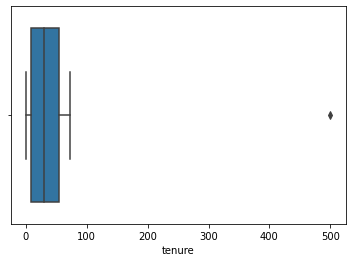

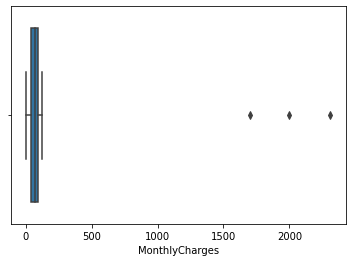

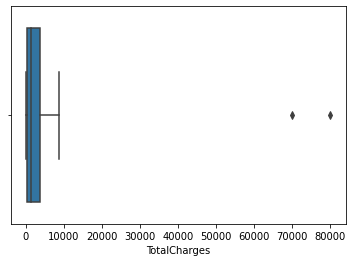

In [ ]:
print('Distribution of data before outliers are handled')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Insert variable
plt.figure() # make a new figure
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # make a new figure
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # make a new figure
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

**Handle outliers**

After knowing which variables have outliers, then I am handling the outliers using the interquartile range (IQR) method.

I am using the result of processing in the previous step to be processed in this step. I also use the `quantile()` function to see a specific quantile and `mask()` to replace the values.

In [ ]:
# Handle with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('The maximum value of each variable')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nThe minimum value of each variable')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nDistribution of data after outliers handled')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

The maximum value of each variable
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

The minimum value of each variable
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Distribution of data after outliers handled
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


From the three boxplots of `tenure`, `MonthlyCharges`, and `TotalCharges` clearly indicated there were outliers. This can be identified from the points that are far from the boxplot image. Then if I look at the distribution of the data from the `max` column, there is also a very high value of max.

Then the outlier values are handled by changing its value to the maximum and minimum values of the interquartile range (IQR). After handling the outliers, and looking at the spread of the data, it appears that there are no more outlier values.

**Detect non-standard values**

Detects whether there are values of non-standard in categorical variables. This usually occurs due to errors in data input. The difference in terms used is one of the factors that often occur, for that I need standardization of the data that has been inputted. I am using the `value_counts()` function to see the number of unique values per variables.

In [ ]:
# Input variables
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

Standardize categorical variables

After I knew which variables have non-standard values, then I am standardizing them with the most patterns, provided that they don't change their meaning. Example: Yes -> Yes

Then I looked back at the unique values of each variable that had been changed. I am using `replace()` function to standardize the values.

In [ ]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Input variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


When I look further from the number of unique values of each categorical variable, that there clearly are some variables that are non-standard. Those variables are:
* `Gender` (Female, Male, Wanita, Laku-Laki), which can be standardized to (Female, Male) because they have same meaning.
* `Dependents` (Yes, No, Iya), which can be standardized to (Yes, No) because they have same meaning.
* `Churn` (Yes, No, Churn), which can be standardized to (Yes, No) because they have same meaning.

After I just standardized the value, and I looked back at the shape of the data, it was standardized well for the unique values.